Pretrained convnet

In [199]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [200]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_19 (Flatten)        (None, 25088)             0         
                                                                 
 dense_38 (Dense)            (None, 256)               6422784   
                                                                 
 dense_39 (Dense)            (None, 100)               25700     
                                                                 
Total params: 21,163,172
Trainable params: 21,163,172
Non-trainable params: 0
_________________________________________________________________


In [201]:
print('This is the number of trainable weights '
         'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [202]:
conv_base.trainable = False
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [203]:
from keras.preprocessing.image import ImageDataGenerator
a = ImageDataGenerator(
    rescale=1./255)

In [204]:
train=a.flow_from_directory(directory='/Users/vijay/Downloads/sports/train',
                           target_size=(224, 224), batch_size=10, class_mode='categorical')

Found 13572 images belonging to 100 classes.


In [205]:
for data_batch, labels_batch in train:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 224, 224, 3)
labels batch shape: (10, 100)


In [206]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [207]:
valid=valid_datagen.flow_from_directory(directory='/Users/vijay/Downloads/sports/valid',
                           target_size=(224, 224), batch_size=10, class_mode='categorical')

Found 500 images belonging to 100 classes.


In [208]:
for data_batch, labels_batch in valid:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 224, 224, 3)
labels batch shape: (10, 100)


In [209]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [210]:
history = model.fit(train,steps_per_epoch=100,epochs=100,validation_data=valid)

Epoch 1/100
100/100 [==============================] - 356s 4s/step - loss: 5.5338 - accuracy: 0.0100 - val_loss: 4.6014 - val_accuracy: 0.0120
Epoch 2/100
100/100 [==============================] - 385s 4s/step - loss: 4.6428 - accuracy: 0.0160 - val_loss: 4.7302 - val_accuracy: 0.0160
Epoch 3/100
100/100 [==============================] - 382s 4s/step - loss: 4.5694 - accuracy: 0.0250 - val_loss: 4.4997 - val_accuracy: 0.0220
Epoch 4/100
100/100 [==============================] - 379s 4s/step - loss: 4.4127 - accuracy: 0.0280 - val_loss: 4.3307 - val_accuracy: 0.0320
Epoch 5/100
100/100 [==============================] - 375s 4s/step - loss: 4.2354 - accuracy: 0.0460 - val_loss: 4.1672 - val_accuracy: 0.0680
Epoch 6/100
100/100 [==============================] - 370s 4s/step - loss: 4.0797 - accuracy: 0.0630 - val_loss: 3.9504 - val_accuracy: 0.1020
Epoch 7/100
100/100 [==============================] - 368s 4s/step - loss: 3.8468 - accuracy: 0.1010 - val_loss: 3.8927 - val_accuracy:

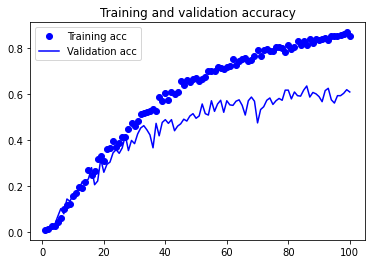

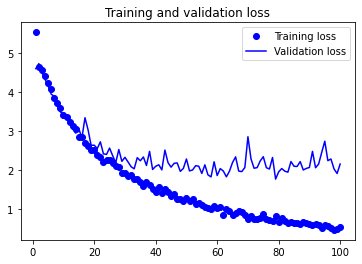

In [211]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()